In [301]:
import torch 
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [302]:
model_path = "./convertModel/Avatar_align_frmale_cyclegan.pth.tar"
image_path_A = "../../../DATA/CG_Final_face_gan_data/Avatar_female_align2female/trainA/67.jpg"
image_path_B = "../../../DATA/CG_Final_face_gan_data/Avatar_female_align2female/trainB/33.jpg"

In [64]:
model = torch.load(model_path)

In [272]:
# imageA = cv2.imread(image_path)
# imageB = cv2.imread(image_path)
imageA = Image.open(image_path_A).convert('RGB')
imageB = Image.open(image_path_B).convert('RGB')

In [273]:
def get_transform():
    transform = transforms.Compose([
#         transforms.ToPILImage(),
        transforms.Resize(256, Image.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    return transform
tran = get_transform()

In [203]:
data = {"A_paths":"", "B_paths": ""}
data['A'] = torch.unsqueeze(tran(imageA), 0)
data['B'] = torch.unsqueeze(tran(imageB), 0)
print(data['A'].size())
print(data['B'].size())

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


In [252]:
model.set_input(data)  # unpack data from data loader
model.test()           # run inference
visuals = model.get_current_visuals()  # get image results

In [259]:
visuals['fake_B'].size()

torch.Size([1, 3, 256, 256])

In [297]:
fake = visuals['fake_B'].squeeze(0).cpu().numpy()

In [298]:
fake=np.swapaxes(fake,0,1)
fake=np.swapaxes(fake,1,2)
fake = ((fake + 1.0) / 2.0 * 255.0).astype(np.uint8)

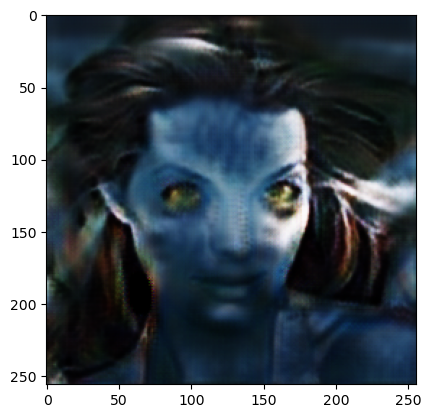

In [299]:
plt.imshow(fake)
plt.show()

In [173]:
def converFace(model, image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    data = {"A_paths":"", "B_paths": ""}
    data['A'] = torch.unsqueeze(transform(image), 0)
    data['B'] = torch.unsqueeze(transform(image), 0)
    model.set_input(data)  # unpack data from data loader
    model.test()           # run inference
    visuals = model.get_current_visuals()  # get image results
    fake = visuals['fake_B'].squeeze(0).cpu().numpy()
    fake=np.swapaxes(fake,0,1)
    fake=np.swapaxes(fake,1,2)
    return fake

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


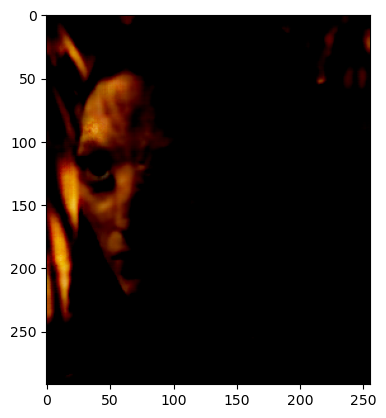

In [307]:
model_path = "ho.pth.tar"
image_path = "../../../DATA/CG_Final_face_gan_data/origin/test/033.jpg"
image = cv2.imread(image_path)
model = torch.load(model_path)
result = converFace(model, image)
plt.imshow(result)
plt.show()

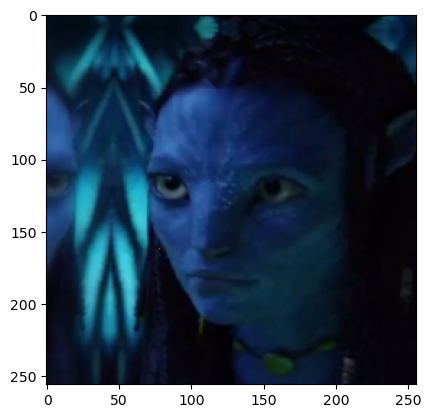

In [306]:
from models.wing import align_face
model_path ="./wing.ckpt" 
lm_path = "./celeba_lm_mean.npz"
image_size = 256
image = cv2.imread(image_path)
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
align_result = align_face(model_path, lm_path, image_size, im_rgb).squeeze(0).cpu().numpy()
align_result=np.swapaxes(align_result,0,1)
align_result=np.swapaxes(align_result,1,2)
align_result = ((align_result + 1.0) / 2.0 * 255.0).astype(np.uint8)
plt.imshow(align_result)
plt.show()